In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

This dataset is very big for an algorithm like KMeans, we will have to reduce its complexity, and that wont affect the results, since the data is in a good shape and when coupled with KMeans robustness, we'l be getting good results nonetheless.

In [3]:
df = pd.read_csv('./movies_dataset.csv')
print(df.shape)
df.head()

(450, 607)


,title,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
3,28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
4,300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


Melting the dataset to make it compatible for KMeans, we'll just be re-arranging the columns to rows, by keying the 'title' column of the dataset.

In [4]:
melted_df = pd.melt(df, id_vars=['title'], var_name='UserID', value_name='Rating')
print(melted_df.shape)
melted_df.head()

(272700, 3)


,title,UserID,Rating
0,10 Things I Hate About You (1999),1,0.0
1,12 Angry Men (1957),1,0.0
2,2001: A Space Odyssey (1968),1,0.0
3,28 Days Later (2002),1,0.0
4,300 (2007),1,0.0


In [5]:
melted_df.isna().sum()

title     0
UserID    0
Rating    0
dtype: int64

In [6]:
df.describe().iloc[:, :5]

,1,2,3,4,5
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,1.140000,0.130000,0.010000,0.648889,0.264444
std,1.964144,0.708908,0.107668,1.476259,0.964320
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,2.000000,5.000000,5.000000


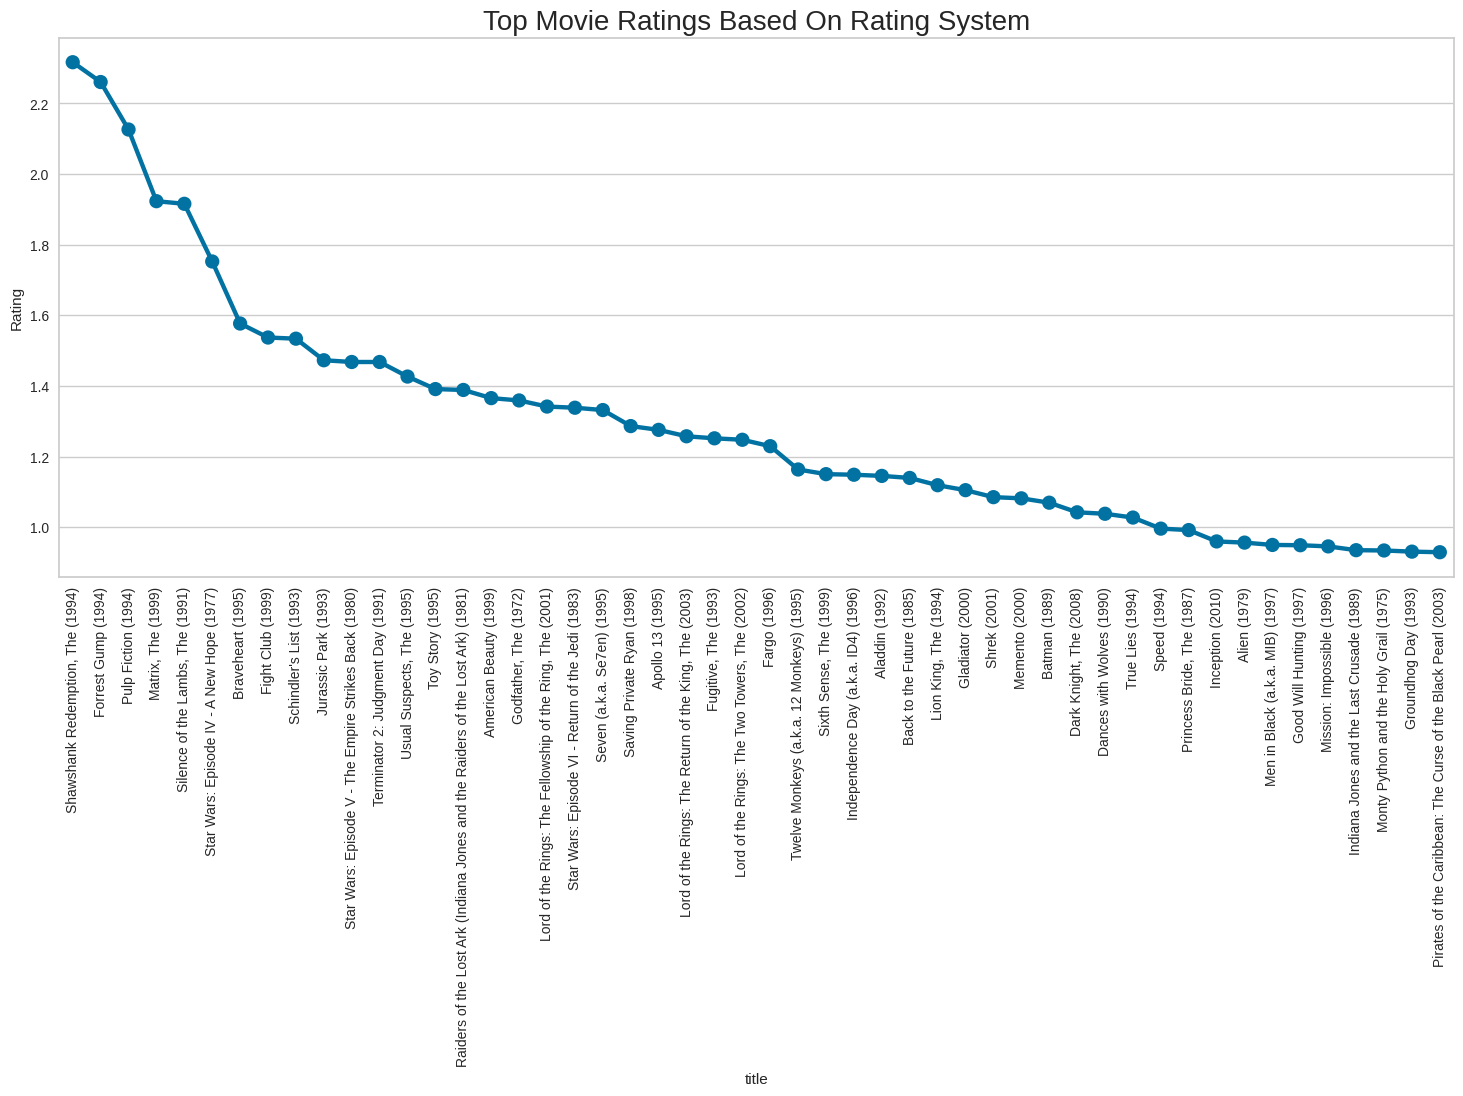

In [63]:
movie_ratings = melted_df.groupby(['title'])['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)[:50]
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='title',y='Rating',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.xticks(rotation=90)
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [9]:
X = melted_df[['UserID','Rating']].values
kmeans_1 = KMeans(n_clusters=5)
predictions = kmeans_1.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
predictions.inertia_

340982962.3042711

In [11]:
melted_df['UserID'].value_counts()

1      450
401    450
403    450
404    450
405    450
      ... 
205    450
206    450
207    450
208    450
610    450
Name: UserID, Length: 606, dtype: int64

Shows that there are 450 reviews for every movie in the dataset.

In [12]:
np.unique(melted_df['UserID'].value_counts().values)

array([450])

So we can reduce the review to 300 each, a significant reduction while keeping the model stability intact.

In [15]:
melted_df['UserID'] = melted_df['UserID'].astype(int)
new_df = melted_df.drop(melted_df[melted_df['UserID'] > 300].index)
new_df.shape

(134100, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


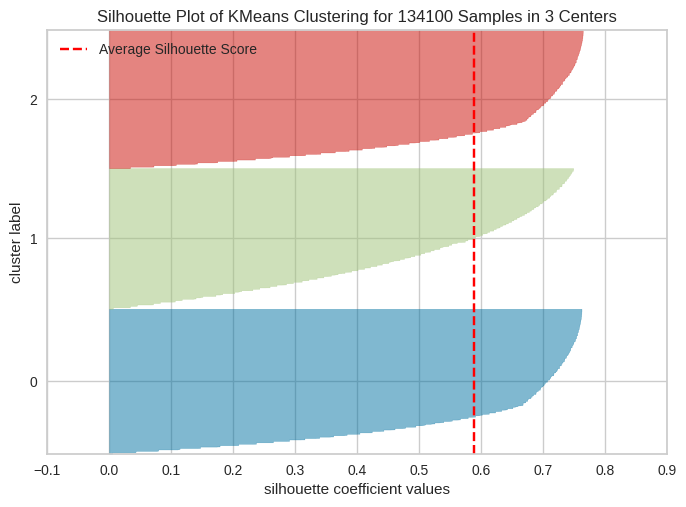

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 134100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X = new_df[['UserID','Rating']].values

# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [19]:
X = new_df[['UserID','Rating']].values

inertia=[]
sil_score =[]
for i in range(2,12):
    kmeans = KMeans(i, n_init='auto', verbose=2)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    iner_iter = kmeans.inertia_
    inertia.append(iner_iter)
    sil_score.append(silhouette_score(X,labels))

Initialization complete
Iteration 0, inertia 504690703.8125.
Iteration 1, inertia 317957257.96102333.
Iteration 2, inertia 268734023.0331346.
Iteration 3, inertia 256034322.15283716.
Iteration 4, inertia 252926968.4333601.
Iteration 5, inertia 252183952.17692354.
Iteration 6, inertia 252015145.06835508.
Iteration 7, inertia 251981083.53638005.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 128842437.3125.
Iteration 1, inertia 113324723.99180503.
Iteration 2, inertia 112521079.56255662.
Iteration 3, inertia 112487724.01877706.
Iteration 4, inertia 112465000.58384156.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 102164803.8125.
Iteration 1, inertia 90591755.88838996.
Iteration 2, inertia 82643717.66926698.
Iteration 3, inertia 77070103.05802608.
Iteration 4, inertia 73195620.53936327.
Iteration 5, inertia 70296120.13516645.
Iteration 6, inertia 68226619.50814438.
Iteration 7, inertia 66885809.921355

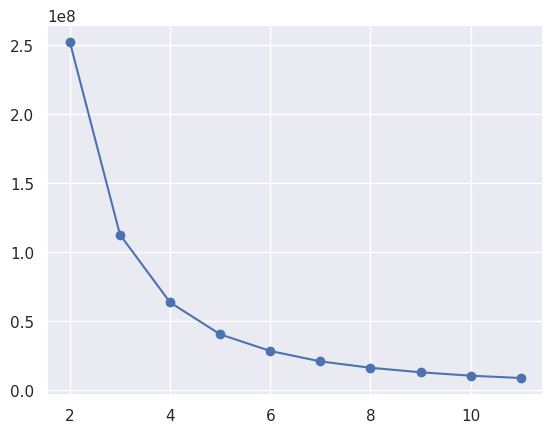

In [22]:
number_clusters = range(2,12)
plt.plot(number_clusters,inertia)
plt.scatter(number_clusters,inertia)

Inertia and Silhoette scores (and their decreasing trend) tells that the metrics may further improve upon increasing cluster sizes, but it gets more and more computationally expensive for every increase in cluster number. \

It's worth noting that no 'elbow' exists in this particular case so gotta choose the point which is the lowest in the graph.

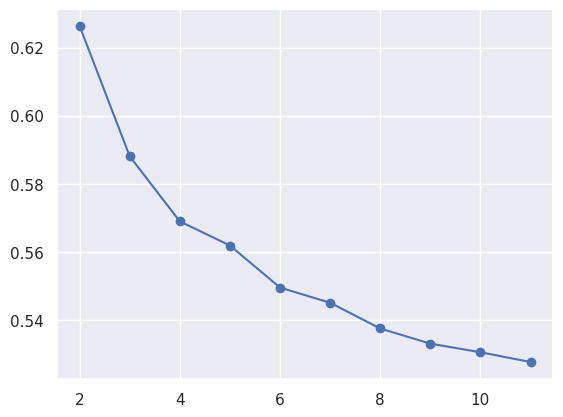

In [21]:
number_clusters = range(2,12)
plt.plot(number_clusters,sil_score)
plt.scatter(number_clusters,sil_score)

In [64]:
kmeansFinal = KMeans(11)
kmeansFinal.fit(X)
kmeansFinal.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([8, 8, 8, ..., 3, 3, 3], dtype=int32)

In [65]:
new_df['Clusters'] = kmeansFinal.labels_
new_df.head()

,title,UserID,Rating,Clusters,MovieID
0,10 Things I Hate About You (1999),1,0.0,8,0
1,12 Angry Men (1957),1,0.0,8,1
2,2001: A Space Odyssey (1968),1,0.0,8,2
3,28 Days Later (2002),1,0.0,8,3
4,300 (2007),1,0.0,8,4


Label encoding the movies so that exact names need not be passsed to the recommender system.

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Encode labels in column 'species'.
new_df['MovieID']= label_encoder.fit_transform(new_df['title'])

new_df.head()

,title,UserID,Rating,Clusters,MovieID
0,10 Things I Hate About You (1999),1,0.0,4,0
1,12 Angry Men (1957),1,0.0,4,1
2,2001: A Space Odyssey (1968),1,0.0,4,2
3,28 Days Later (2002),1,0.0,4,3
4,300 (2007),1,0.0,4,4


In [61]:
movID = input("Enter movie ID: ")
movCluster = new_df.loc[new_df['MovieID'] == movID, 'Clusters'].value_counts().max()
recommended_Movies = new_df.loc[new_df['Clusters'] == 6, ['title', "MovieID"]]
recommended_Movies = recommended_Movies[recommended_Movies.duplicated()==False][:10]

recommended_Movies = recommended_Movies.drop(recommended_Movies[recommended_Movies['MovieID'] == movID].index)
recommended_Movies = list(recommended_Movies['title'].values)
print('\n'.join(recommended_Movies))

Enter movie ID: 4
10 Things I Hate About You (1999)
12 Angry Men (1957)
2001: A Space Odyssey (1968)
28 Days Later (2002)
300 (2007)
40-Year-Old Virgin, The (2005)
A.I. Artificial Intelligence (2001)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
